## QUESTION

Use the breast cancer dataset in Sklearn to build a logistic regression model to predict if a tumor is malignant or benign. Evaluate the performance of the model using cross-validation and confusion matrix.

### Breast Cancer

### Import Header Files

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score, precision_score

### Load Data

In [2]:
breast_cancer = load_breast_cancer()
breast_cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [3]:
df = pd.DataFrame(data = breast_cancer.data, columns = breast_cancer.feature_names)
df['target'] = breast_cancer.target
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


### Data Information

In [4]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

In [5]:
df.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [7]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


### Data Cleaning

In [8]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

<AxesSubplot:>

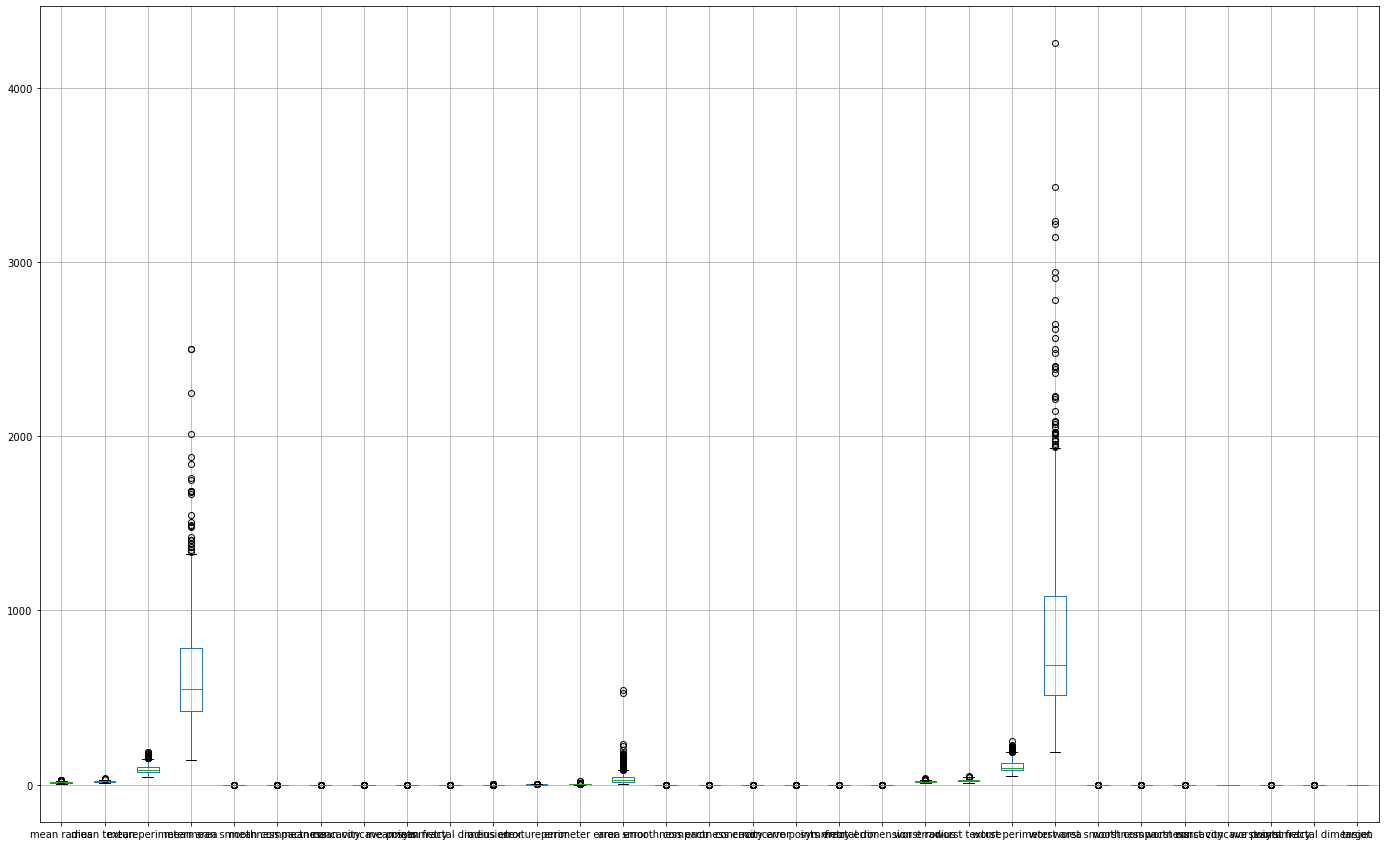

In [9]:
df.boxplot(figsize = (24, 15))

### Determining Classes

In [10]:
df['target'].value_counts()

1    357
0    212
Name: target, dtype: int64

C:\Users\Public\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='count'>

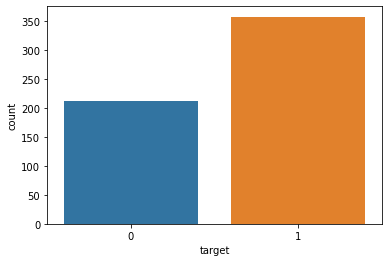

In [11]:
sns.countplot(df['target'])

### Balancing Classes

In [12]:
over_sample = SMOTE()
df1 = over_sample.fit_resample(df[['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension','radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']], df['target'])
data = pd.DataFrame(df1[0])
data['target'] = df1[1]
data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.990000,10.380000,122.800000,1001.000000,0.118400,0.277600,0.300100,0.147100,0.241900,0.078710,...,17.330000,184.600000,2019.000000,0.162200,0.665600,0.711900,0.265400,0.460100,0.118900,0
1,20.570000,17.770000,132.900000,1326.000000,0.084740,0.078640,0.086900,0.070170,0.181200,0.056670,...,23.410000,158.800000,1956.000000,0.123800,0.186600,0.241600,0.186000,0.275000,0.089020,0
2,19.690000,21.250000,130.000000,1203.000000,0.109600,0.159900,0.197400,0.127900,0.206900,0.059990,...,25.530000,152.500000,1709.000000,0.144400,0.424500,0.450400,0.243000,0.361300,0.087580,0
3,11.420000,20.380000,77.580000,386.100000,0.142500,0.283900,0.241400,0.105200,0.259700,0.097440,...,26.500000,98.870000,567.700000,0.209800,0.866300,0.686900,0.257500,0.663800,0.173000,0
4,20.290000,14.340000,135.100000,1297.000000,0.100300,0.132800,0.198000,0.104300,0.180900,0.058830,...,16.670000,152.200000,1575.000000,0.137400,0.205000,0.400000,0.162500,0.236400,0.076780,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,14.136342,22.452166,93.286384,623.193727,0.102980,0.125210,0.132904,0.059049,0.198808,0.064189,...,31.041946,113.503936,796.533888,0.153798,0.416610,0.470890,0.146656,0.360686,0.105867,0
710,13.781554,20.357498,92.553063,578.537940,0.108936,0.198526,0.167675,0.070641,0.208367,0.073782,...,29.995439,107.055104,718.480121,0.157526,0.639452,0.602812,0.198830,0.360948,0.128348,0
711,15.393245,23.836357,102.633113,741.841066,0.106044,0.161832,0.154943,0.083343,0.190968,0.064510,...,34.878122,146.813464,1274.827819,0.159341,0.601268,0.587460,0.198243,0.398135,0.099933,0
712,14.443855,20.441906,94.388557,644.766191,0.096295,0.108283,0.104424,0.054808,0.195693,0.060902,...,30.219900,109.062665,819.442397,0.138130,0.260854,0.325562,0.142982,0.283807,0.083563,0


In [13]:
data['target'].value_counts()

0    357
1    357
Name: target, dtype: int64

C:\Users\Public\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='count'>

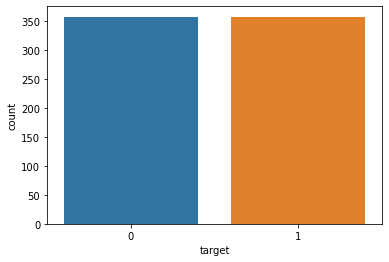

In [14]:
sns.countplot(data['target'])

### Data Scaling

In [15]:
scalar = MinMaxScaler()
scaled = scalar.fit_transform(data[['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension', 'target']])
data1 = pd.DataFrame(data = scaled, columns = data.columns)
data1

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864,0.0
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878,0.0
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433,0.0
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711,0.0
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,0.338650,0.430915,0.342038,0.203476,0.454544,0.324612,0.311397,0.293483,0.468730,0.299689,...,0.506981,0.314228,0.150249,0.545654,0.377721,0.376110,0.503972,0.402495,0.333379,0.0
710,0.321859,0.360078,0.336971,0.184534,0.508315,0.549495,0.392865,0.351099,0.517007,0.501733,...,0.479090,0.282111,0.131066,0.570267,0.593922,0.481479,0.683265,0.403013,0.480832,0.0
711,0.398137,0.477726,0.406628,0.253803,0.482204,0.436944,0.363033,0.414230,0.429132,0.306451,...,0.609225,0.480121,0.267801,0.582253,0.556876,0.469217,0.681247,0.476316,0.294460,0.0
712,0.353204,0.362932,0.349655,0.212626,0.394199,0.272693,0.244667,0.272405,0.452993,0.230461,...,0.485072,0.292109,0.155879,0.442186,0.226605,0.260034,0.491348,0.250950,0.187083,0.0


### Data Representation

In [16]:
data1.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,...,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,0.371958,0.337037,0.367027,0.246162,0.404250,0.282013,0.238651,0.280704,0.390291,0.266445,...,0.379543,0.316747,0.197628,0.416870,0.239321,0.242705,0.439510,0.275947,0.196507,0.500000
std,0.175723,0.138439,0.176603,0.160063,0.121825,0.162268,0.188810,0.199854,0.135257,0.145104,...,0.156378,0.175103,0.149442,0.147109,0.152948,0.164300,0.230537,0.123087,0.117191,0.500351
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.240381,0.242137,0.235298,0.129162,0.315631,0.157145,0.083642,0.116004,0.293939,0.162647,...,0.266658,0.180886,0.088773,0.318002,0.129969,0.111122,0.254175,0.195052,0.113800,0.000000
50%,0.333854,0.332432,0.329037,0.194973,0.406924,0.261746,0.201863,0.244682,0.381313,0.242523,...,0.374991,0.276914,0.147957,0.416892,0.204951,0.225040,0.420275,0.258237,0.172094,0.500000
75%,0.494352,0.415012,0.487856,0.341192,0.482712,0.373121,0.355552,0.423282,0.460885,0.340354,...,0.486695,0.430273,0.274295,0.515122,0.326049,0.350080,0.627709,0.330426,0.251935,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### OUTLIERS

### Detection

<AxesSubplot:>

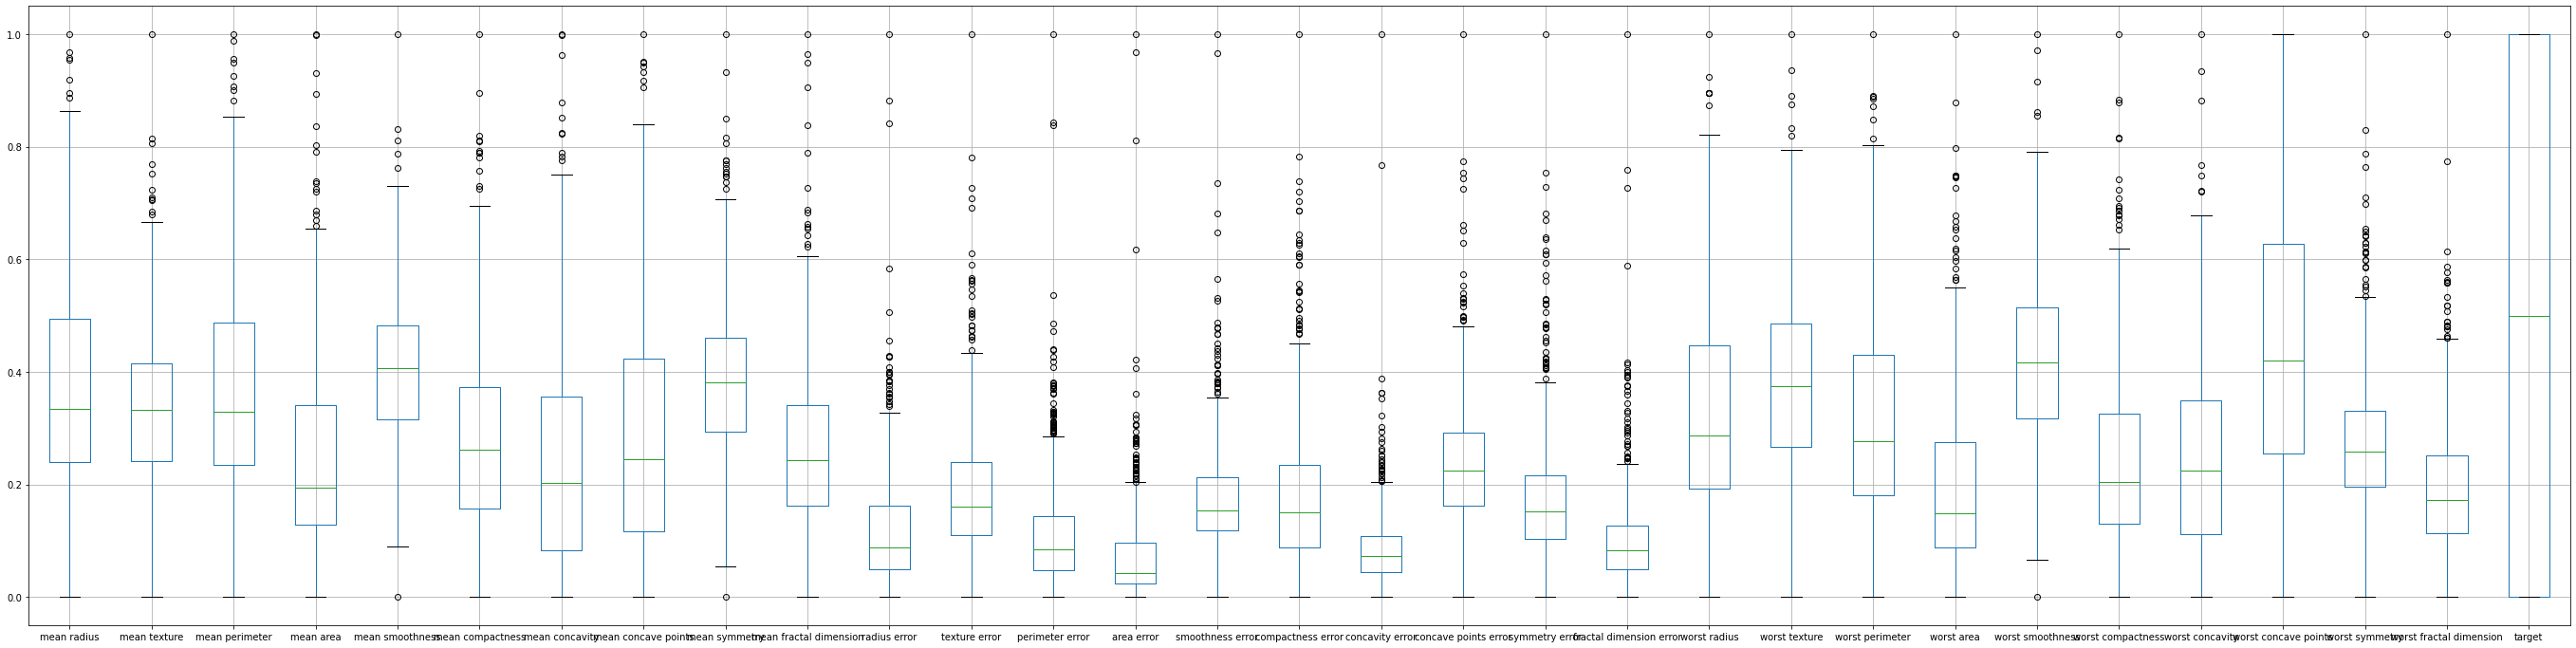

In [17]:
data1.boxplot(figsize = (48,12))

### Removal

In [18]:
def out_iqr(data, col):
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    lwr = q1 - 1.5 * iqr
    upr = q3 + 1.5 * iqr
    return lwr, upr 

In [19]:
for i in data1.columns:
    lwr, upr = out_iqr(data1, i)
    data1[i].clip(lwr, upr, inplace = True)
data1

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.697085,0.703140,0.731113,0.686364,0.605518,...,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.533486,0.418864,0.0
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878,0.0
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433,0.0
3,0.210090,0.360839,0.233501,0.102906,0.733333,0.697085,0.565604,0.522863,0.711303,0.606913,...,0.385928,0.241347,0.094008,0.810804,0.620170,0.548642,0.884880,0.533486,0.459137,0.0
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,0.338650,0.430915,0.342038,0.203476,0.454544,0.324612,0.311397,0.293483,0.468730,0.299689,...,0.506981,0.314228,0.150249,0.545654,0.377721,0.376110,0.503972,0.402495,0.333379,0.0
710,0.321859,0.360078,0.336971,0.184534,0.508315,0.549495,0.392865,0.351099,0.517007,0.501733,...,0.479090,0.282111,0.131066,0.570267,0.593922,0.481479,0.683265,0.403013,0.459137,0.0
711,0.398137,0.477726,0.406628,0.253803,0.482204,0.436944,0.363033,0.414230,0.429132,0.306451,...,0.609225,0.480121,0.267801,0.582253,0.556876,0.469217,0.681247,0.476316,0.294460,0.0
712,0.353204,0.362932,0.349655,0.212626,0.394199,0.272693,0.244667,0.272405,0.452993,0.230461,...,0.485072,0.292109,0.155879,0.442186,0.226605,0.260034,0.491348,0.250950,0.187083,0.0


In [20]:
data1.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,...,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,0.371321,0.335723,0.366217,0.243386,0.403605,0.280139,0.237174,0.280130,0.388556,0.263211,...,0.378905,0.315947,0.193704,0.416132,0.236438,0.241561,0.439510,0.271916,0.193629,0.500000
std,0.173727,0.134331,0.174073,0.150605,0.119001,0.156440,0.183958,0.198006,0.129697,0.134091,...,0.154321,0.172587,0.136587,0.144566,0.143530,0.160266,0.230537,0.110555,0.107251,0.500351
min,0.000000,0.000000,0.000000,0.000000,0.065011,0.000000,0.000000,0.000000,0.043522,0.000000,...,0.000000,0.000000,0.000000,0.022321,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.240381,0.242137,0.235298,0.129162,0.315631,0.157145,0.083642,0.116004,0.293939,0.162647,...,0.266658,0.180886,0.088773,0.318002,0.129969,0.111122,0.254175,0.195052,0.113800,0.000000
50%,0.333854,0.332432,0.329037,0.194973,0.406924,0.261746,0.201863,0.244682,0.381313,0.242523,...,0.374991,0.276914,0.147957,0.416892,0.204951,0.225040,0.420275,0.258237,0.172094,0.500000
75%,0.494352,0.415012,0.487856,0.341192,0.482712,0.373121,0.355552,0.423282,0.460885,0.340354,...,0.486695,0.430273,0.274295,0.515122,0.326049,0.350080,0.627709,0.330426,0.251935,1.000000
max,0.875309,0.674325,0.866692,0.659237,0.733333,0.697085,0.763418,0.884199,0.711303,0.606913,...,0.816750,0.804355,0.552577,0.810804,0.620170,0.708518,1.000000,0.533486,0.459137,1.000000


<AxesSubplot:>

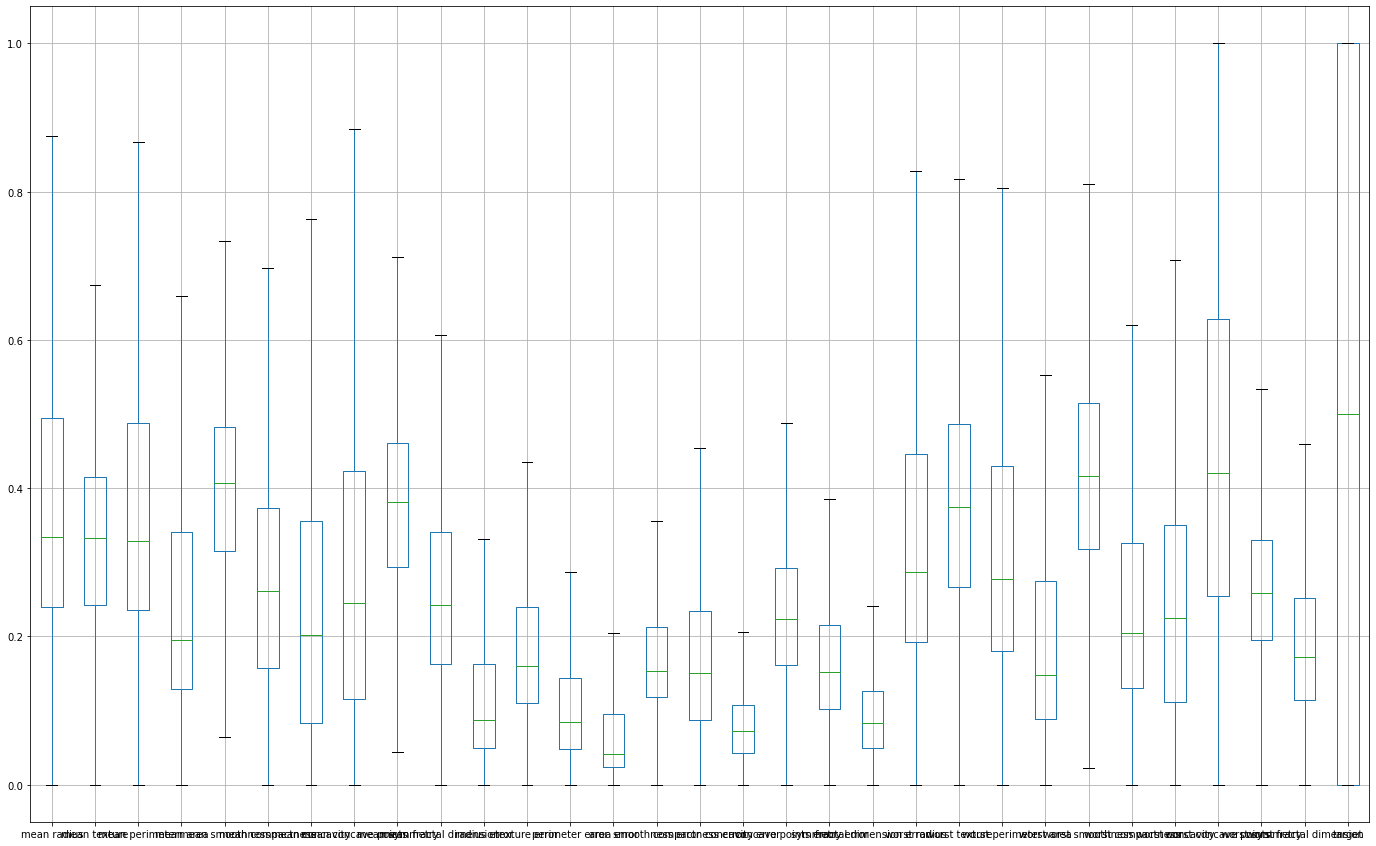

In [21]:
data1.boxplot(figsize = (24, 15))

### Determinimg Co-Relation in Features

In [22]:
data1.corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
mean radius,1.000000,0.351973,0.997912,0.992918,0.184683,0.512247,0.704943,0.834823,0.171888,-0.318496,...,0.297548,0.967968,0.959579,0.123055,0.420467,0.555119,0.752464,0.192737,0.011253,-0.730655
mean texture,0.351973,1.000000,0.359973,0.354601,0.018545,0.272620,0.346355,0.332362,0.103786,-0.059231,...,0.905521,0.383365,0.365842,0.097187,0.294240,0.335100,0.328915,0.120155,0.128555,-0.437880
mean perimeter,0.997912,0.359973,1.000000,0.990913,0.222054,0.561352,0.741793,0.861635,0.207277,-0.267785,...,0.305760,0.972819,0.959453,0.154152,0.462517,0.591102,0.778679,0.217620,0.055303,-0.743265
mean area,0.992918,0.354601,0.990913,1.000000,0.181077,0.500344,0.704213,0.832103,0.172161,-0.306259,...,0.293436,0.967514,0.970534,0.122492,0.400052,0.542927,0.738523,0.178182,0.005553,-0.717278
mean smoothness,0.184683,0.018545,0.222054,0.181077,1.000000,0.678855,0.554935,0.568475,0.566885,0.593414,...,0.076871,0.256398,0.224401,0.811361,0.518094,0.486085,0.531068,0.412511,0.530944,-0.374364
mean compactness,0.512247,0.272620,0.561352,0.500344,0.678855,1.000000,0.885094,0.826219,0.623324,0.556132,...,0.276189,0.593406,0.526429,0.574892,0.877531,0.836731,0.817209,0.525774,0.698073,-0.600903
mean concavity,0.704943,0.346355,0.741793,0.704213,0.554935,0.885094,1.000000,0.934320,0.513892,0.298567,...,0.321560,0.751330,0.708700,0.463808,0.760807,0.887348,0.873661,0.421164,0.501068,-0.706189
mean concave points,0.834823,0.332362,0.861635,0.832103,0.568475,0.826219,0.934320,1.000000,0.477953,0.143884,...,0.308087,0.864339,0.832275,0.449842,0.674636,0.773206,0.912636,0.393997,0.364833,-0.769758
mean symmetry,0.171888,0.103786,0.207277,0.172161,0.566885,0.623324,0.513892,0.477953,1.000000,0.480735,...,0.126953,0.239726,0.205011,0.441096,0.512762,0.473974,0.459912,0.722518,0.475418,-0.346746
mean fractal dimension,-0.318496,-0.059231,-0.267785,-0.306259,0.593414,0.556132,0.298567,0.143884,0.480735,1.000000,...,-0.016435,-0.211336,-0.249032,0.509472,0.469505,0.328585,0.161697,0.323622,0.773364,0.028501


### Features Selection

<AxesSubplot:>

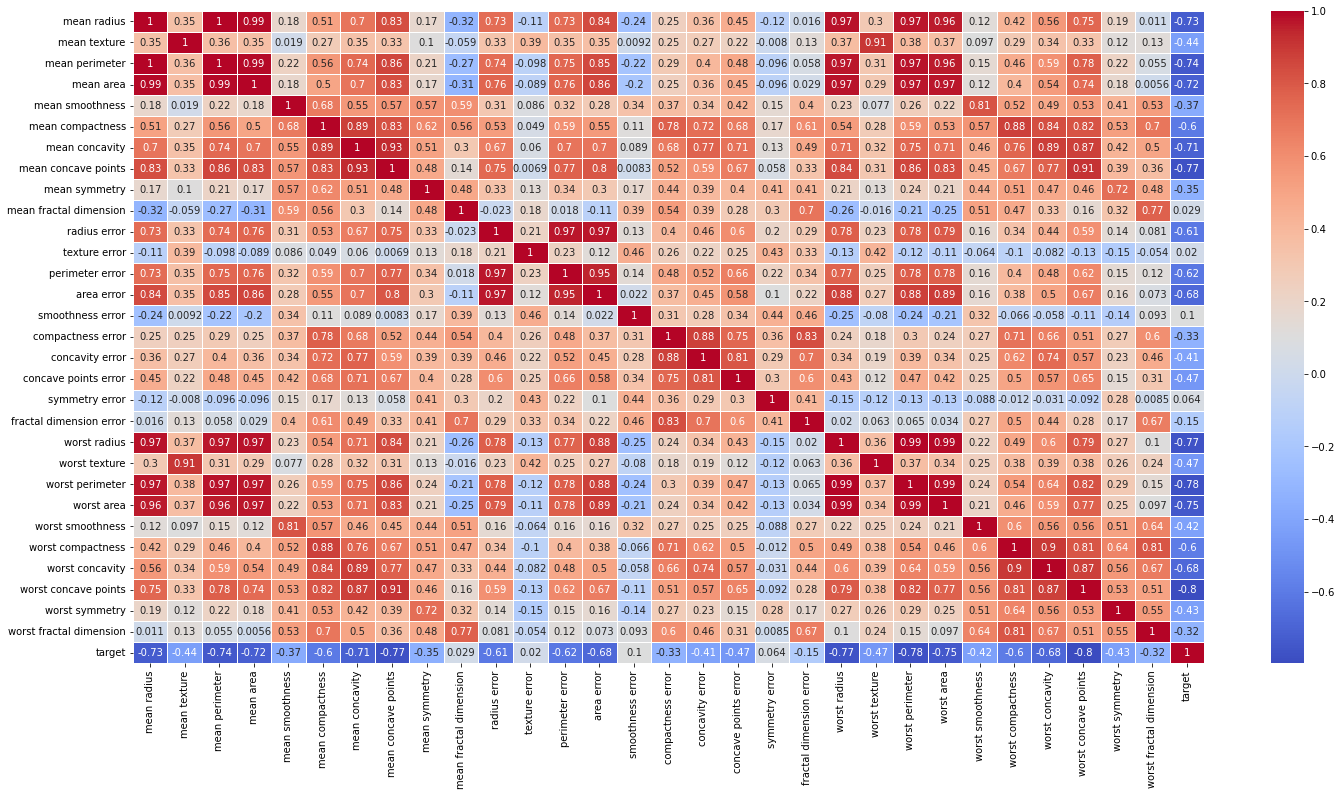

In [23]:
plt.figure(figsize = (24,12))
sns.heatmap(data1.corr(), annot = True, cmap = 'coolwarm', linewidths = 1)

In [24]:
col = ['area error', 'worst perimeter', 'worst concave points']
mod_data = data1[col]
mod_data['target'] = data1['target']
mod_data.head(30)

C:\Users\BAPS\AppData\Local\Temp\ipykernel_10440\657788000.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mod_data['target'] = data1['target']


,area error,worst perimeter,worst concave points,target
0,0.204637,0.668310,0.912027,0.0
1,0.125660,0.539818,0.639175,0.0
2,0.162922,0.508442,0.835052,0.0
3,0.038155,0.241347,0.884880,0.0
4,0.163688,0.506948,0.558419,0.0
5,0.038080,0.263908,0.598282,0.0
6,0.087987,0.511928,0.663918,0.0
7,0.082477,0.299766,0.534708,0.0
8,0.032720,0.277852,0.707904,0.0
9,0.032010,0.235271,0.759450,0.0


### Plotting Features

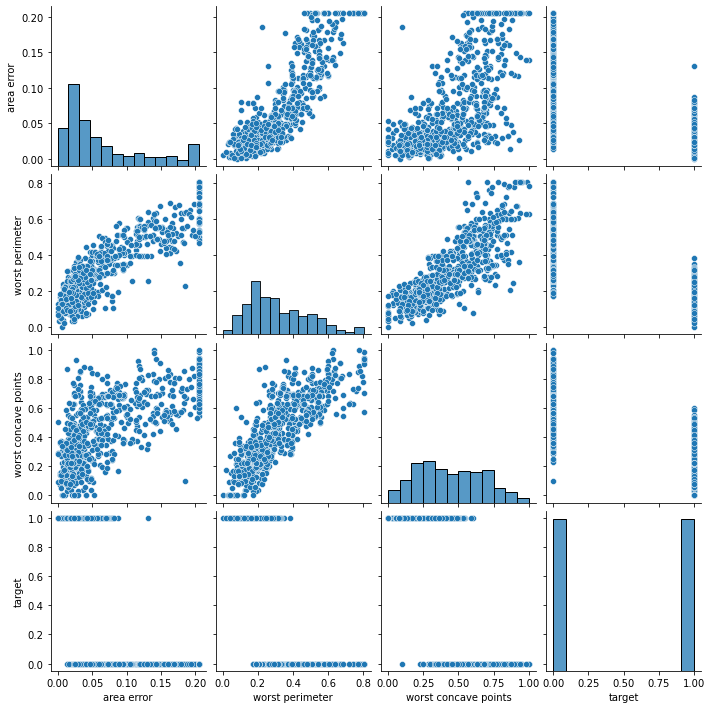

In [25]:
sns.pairplot(mod_data)

In [1]:
def join_func(col1, col2):
    sns.jointplot(col1, col2, data = data1, hue = 'target')

C:\Users\Public\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Public\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Public\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Public\ana

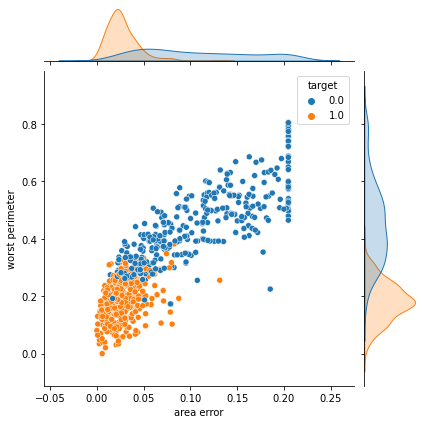

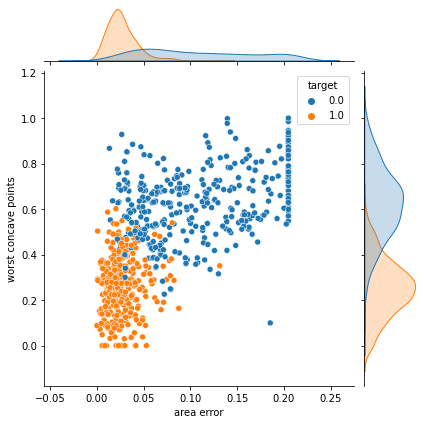

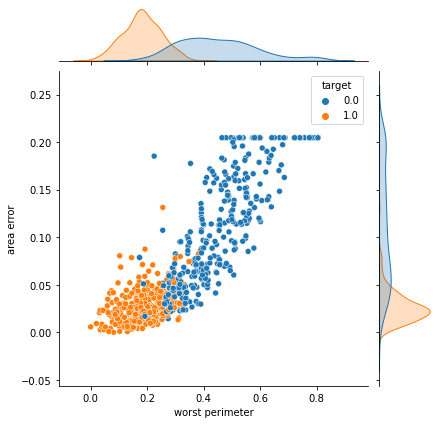

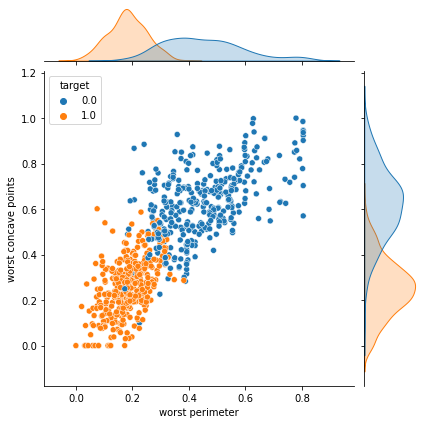

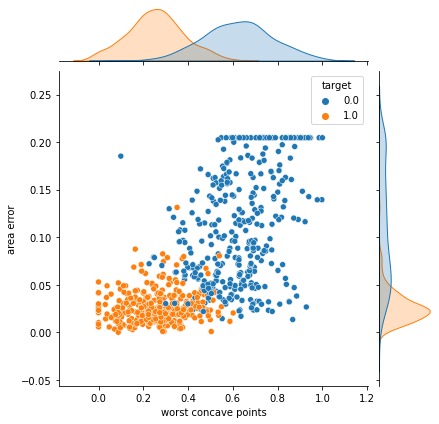

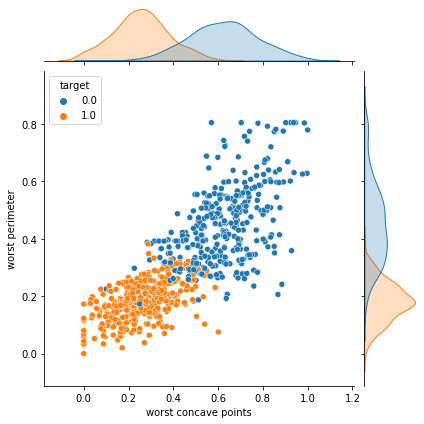

In [27]:
for i in data1[col]:
    for j in data1[col]:
        if (i != j):
            join_func(i, j)

### MODEL TRAINING

In [28]:
X = data1[col]
y = data1['target']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 102)

In [30]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

LogisticRegression()

### Finding Parameters

In [31]:
pred = logmodel.predict(X_test)
print('Confusion matrix : ')
print(confusion_matrix(y_test, pred))
print('Accuracy : ', accuracy_score(y_test, pred))

Confusion matrix : 
[[108   9]
 [  8 111]]
Accuracy :  0.9279661016949152


In [32]:
logmodel.intercept_

array([4.4870176])

In [33]:
logmodel.coef_

array([[-1.84041345, -5.49389081, -6.43576427]])

### MODEL EVALUATION

### Mathematical formulas

In [34]:
print("Classification Report : \n", classification_report(y_test,pred))

Classification Report : 
               precision    recall  f1-score   support

         0.0       0.93      0.92      0.93       117
         1.0       0.93      0.93      0.93       119

    accuracy                           0.93       236
   macro avg       0.93      0.93      0.93       236
weighted avg       0.93      0.93      0.93       236



### Plotting Models For Each Feature

Text(0, 0.5, 'target')

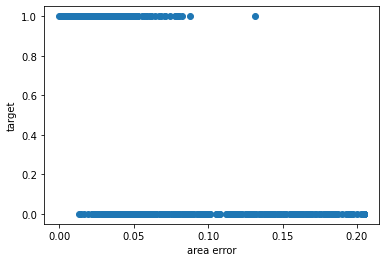

In [35]:
plt.scatter(data1[col[0]], data1['target'])
plt.xlabel(col[0])
plt.ylabel('target')

Text(0, 0.5, 'target')

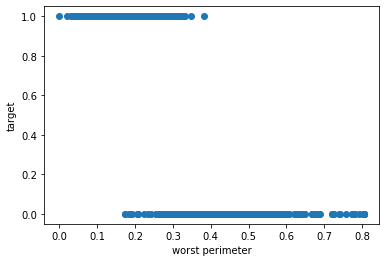

In [36]:
plt.scatter(data1[col[1]], data1['target'])
plt.xlabel(col[1])
plt.ylabel('target')

Text(0, 0.5, 'target')

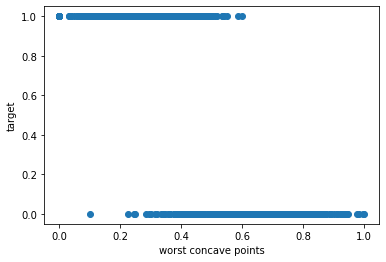

In [37]:
plt.scatter(data1[col[2]], data1['target'])
plt.xlabel(col[2])
plt.ylabel('target')

### Checking Imbalance Of Model

In [38]:
print(logmodel.class_weight)

None


### CROSS - VALIDATION OF MODEL

### Classification Of New Data

In [39]:
newd1 = np.array([[0.2, 0.6, 0.9]])
newd2 = np.array([[0.01, 0.2, 0.25]])

In [40]:
output = logmodel.predict(newd1)
output

C:\Users\Public\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0.])

In [41]:
output = logmodel.predict(newd2)
output

C:\Users\Public\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1.])